In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import pandas as pd
import scipy as sc
from kafe2 import *

# Aufgabe 1: Einführung


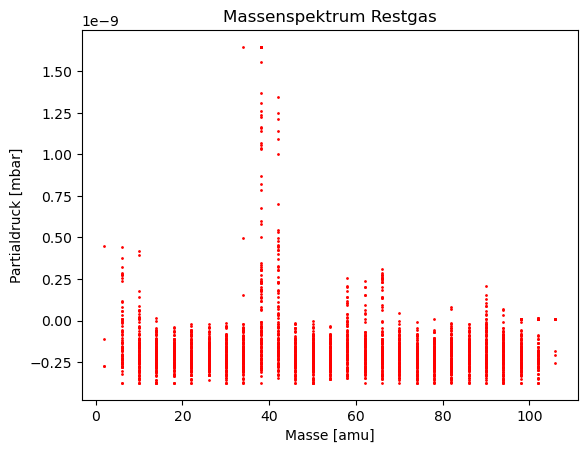

In [2]:
# plotten des Restgasspektrums
rg_1 = pd.read_csv('Data/Restgas(1-50).CSV', skiprows=15)
rg_2 = pd.read_csv('Data/Restgas(1-100).CSV', skiprows=15)

rg_m_1 = np.array(rg_1['CH1'])[200:1832] 
rg_p_1 = np.array(rg_1['CH2'])[200:1832] * 10 ** -10

rg_m_2 = np.array(rg_2['CH1'])[195:1820] 
rg_p_2 = np.array(rg_2['CH2'])[195:1820] * 10 ** -10

rg_m = np.concatenate((rg_m_1, rg_m_2))
rg_p = np.concatenate((rg_p_1, rg_p_2))

plt.plot(rg_m,rg_p,'r.', markersize=2)

plt.xlabel('Masse [amu]')
plt.ylabel('Partialdruck [mbar]')
plt.title('Massenspektrum Restgas')

plt.show()

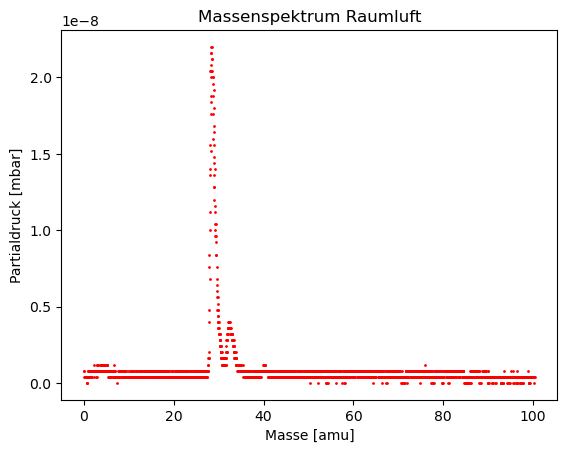

In [3]:
# plotten des Luftspektrums
air_1 = pd.read_csv('Data/Raumluft(1-50).CSV', skiprows=15)
air_2 = pd.read_csv('Data/Raumluft(50-100).CSV', skiprows=15)

air_m_1 = np.array(air_1['CH1'])[200:1807] / 2
air_p_1 = np.array(air_1['CH2'])[200:1807] * 10 ** -9

air_m_2 = np.array(air_2['CH1'])[207:1815] / 2 + 50
air_p_2 = np.array(air_2['CH2'])[207:1815] * 10 ** -9

air_m = np.concatenate((air_m_1, air_m_2))
air_p = np.concatenate((air_p_1, air_p_2))

plt.plot(air_m, air_p, 'r.', markersize=2)

plt.xlabel('Masse [amu]')
plt.ylabel('Partialdruck [mbar]')
plt.title('Massenspektrum Raumluft')

plt.show()

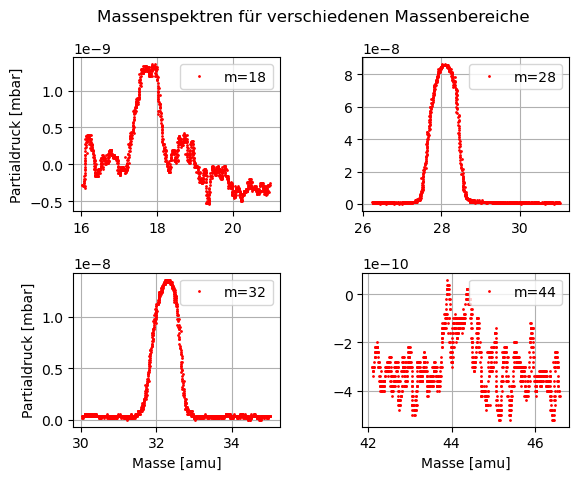

In [4]:
# plotten der einzelnen Linien in genauerer Betrachtung
m18 = pd.read_csv('Data/Raumluft_MS18.CSV', skiprows=15)
m28 = pd.read_csv('Data/Raumluft_MS28.CSV', skiprows=15)
m32 = pd.read_csv('Data/Raumluft_MS32.CSV', skiprows=15)
m44 = pd.read_csv('Data/Raumluft_MS44.CSV', skiprows=15)

m18_m = m18['CH1'][90:1700] / 20 + 16
m18_p = m18['CH2'][90:1700] * 10 ** -10

m28_m = m28['CH1'][150:1720] / 20 + 26
m28_p = m28['CH2'][150:1720] * 10 ** -9

m32_m = m32['CH1'][150:1780] / 20 + 30
m32_p = m32['CH2'][150:1780] * 10 ** -9

m44_m = m44['CH1'][120:1600] / 20 + 42
m44_p = m44['CH2'][120:1600] * 10 ** -10

fig, ax = plt.subplots(2,2, gridspec_kw={'wspace':0.4,'hspace':0.4})

ax[0][0].plot(m18_m, m18_p, 'r.', markersize=2, label='m=18')
ax[0][1].plot(m28_m, m28_p, 'r.', markersize=2, label='m=28')
ax[1][0].plot(m32_m, m32_p, 'r.', markersize=2, label='m=32')
ax[1][1].plot(m44_m, m44_p, 'r.', markersize=2, label='m=44')

fig.suptitle('Massenspektren für verschiedenen Massenbereiche')

ax[0][0].set(xlabel="", ylabel="Partialdruck [mbar]")
ax[1][0].set(xlabel="Masse [amu]", ylabel="Partialdruck [mbar]")
ax[1][1].set(xlabel="Masse [amu]", ylabel="")

for i in [0,1]:
    for j in [0,1]:
        ax[i][j].grid()
        ax[i][j].legend()

plt.show()

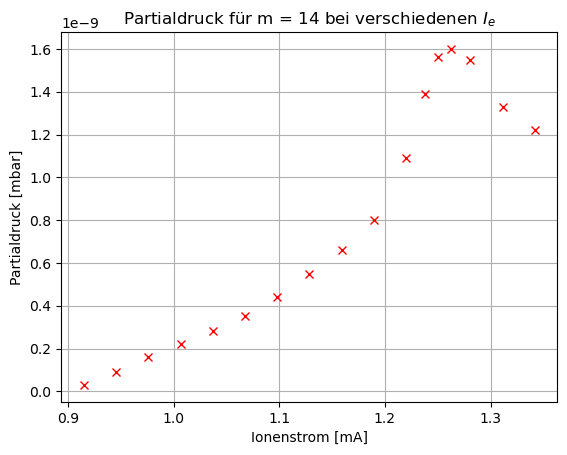

In [22]:
poti = np.array([11, 10.75, 10.5 , 10.35, 10.25 , 10.15 , 10.0 , 9.75 , 9.5 , 9.25 , 9.0 , 8.75 , 8.5 , 8.25 , 8.0 , 7.75 , 7.5])
p = np.array([ 1.22 , 1.33, 1.55 , 1.6 , 1.56 , 1.39 , 1.09 , 0.80 , 0.66 , 0.55 , 0.44 , 0.35 , 0.28 , 0.22 , 0.16 , 0.09 , 0.03]) * 10**-9

plt.plot(0.122 * poti, p, 'rx')

plt.title('Partialdruck für m = 14 bei verschiedenen $I_e$')
plt.xlabel('Ionenstrom [mA]')
plt.ylabel('Partialdruck [mbar]')
plt.grid()
plt.show()

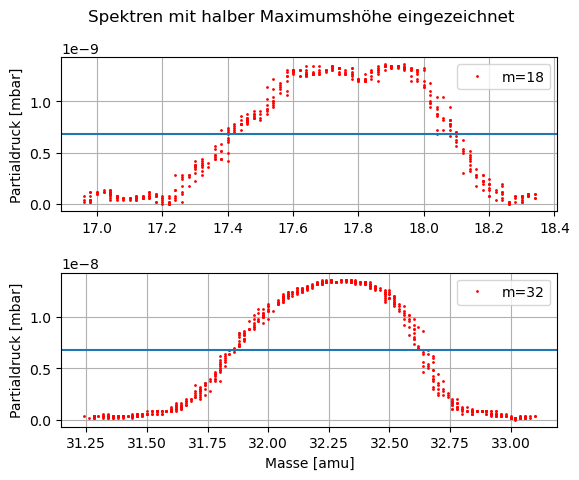

In [6]:
# Bestimmung des Auflösungsvermögens 
rm1 = m18_m[300:750]
rm2 = m32_m[400:1000]

rp1 = np.abs(m18_p)[300:750]
rp2 = np.abs(m32_p)[400:1000]

hmax1 = np.max(rp1) / 2
hmax2 = np.max(rp2) / 2

fig, ax = plt.subplots(2,1, gridspec_kw={'wspace':0.4,'hspace':0.4})

ax[0].plot(rm1, rp1, 'r.', markersize=2, label='m=18')
ax[1].plot(rm2, rp2, 'r.', markersize=2, label='m=32')

fig.suptitle('Spektren mit halber Maximumshöhe eingezeichnet')

ax[0].set(xlabel="", ylabel="Partialdruck [mbar]")
ax[1].set(xlabel="Masse [amu]", ylabel="Partialdruck [mbar]")

for i in [0,1]:
    ax[i].legend()
    ax[i].grid()

ax[0].axhline(hmax1)
ax[1].axhline(hmax2)
plt.show()

# Aufgabe 2: Argon

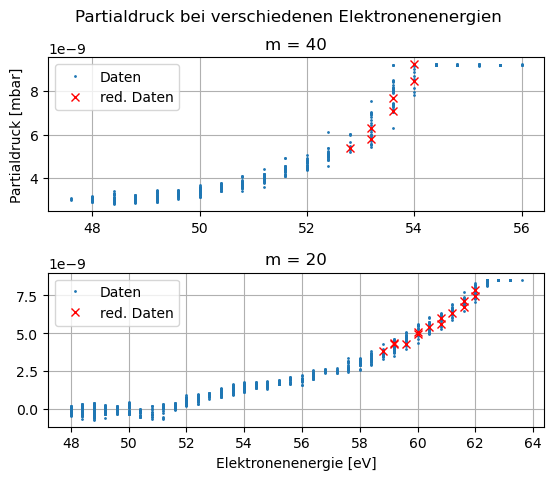

In [83]:
# plotting the argondata
ar40 = pd.read_csv('Data/Argon_MS40.CSV', skiprows=15)
ar40_U = - np.array(ar40['CH1'])[1400::] / 10
ar40_p = np.array(ar40['CH2'])[1400::] * 10 ** -10

dat40_U = ar40_U[375:-120:15]
dat40_p = ar40_p[375:-120:15]

ar20 = pd.read_csv('Data/Argon_MS20.CSV', skiprows=15)
ar20_U = - np.array(ar20['CH1'])[::] / 10
ar20_p = np.array(ar20['CH2'])[::] * 10 ** -10

dat20_U = ar20_U[1600:-120:20]
dat20_p = ar20_p[1600:-120:20]

fig, ax = plt.subplots(2,1, gridspec_kw={'wspace':0.4,'hspace':0.4})
fig.suptitle('Partialdruck bei verschiedenen Elektronenenergien')

ax[0].plot(ar40_U,ar40_p, '.', markersize=2, label='Daten')
ax[0].plot(dat40_U, dat40_p, 'rx', label='red. Daten')

ax[1].plot(ar20_U,ar20_p, '.', markersize=2, label='Daten')
ax[1].plot(dat20_U, dat20_p, 'rx', label='red. Daten')

for i in [0,1]:
    ax[i].legend()
    ax[i].grid()

ax[0].set(title='m = 40', xlabel='', ylabel='Partialdruck [mbar]')
ax[1].set(title='m = 20', xlabel='Elektronenenergie [eV]', ylabel='')

plt.show()

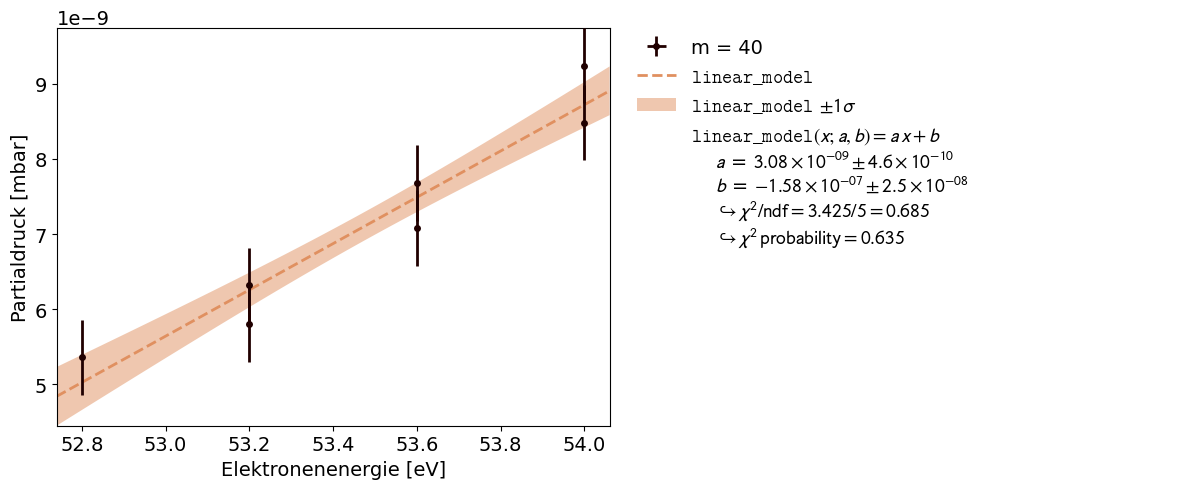

In [97]:
# bestimmung der Unsicherheiten 
sig_p = 0.5 * 10 ** -9
sig_U = 0

# definieren eines linearen Modells
def lin(x,m,b):
    return x * m + b

# fitten zweier linearer Fits
dat40 = XYContainer(dat40_U,dat40_p)

dat40.label = 'm = 40'
dat40.axis_labels = ('Elektronenenergie [eV]','Partialdruck [mbar]')
dat40.add_error('x', sig_U)
dat40.add_error('y', sig_p)

fit40 = XYFit(dat40)
fit40.do_fit()

plot = Plot(fit40)
plot.plot()

plt.show()

# 3. Dissoziationsenergien Stickstoff 

In [9]:
#pressure inside the camber at 9.0*10^-8 mBar
def read_Tek(file, cutoff=[0,1]):

    file = Path().resolve() / file

    try:    
        data=pd.read_csv(file,skiprows=16)
        data=data.set_axis(["time", "Ch1","Ch2"],axis=1)
        length=len(data["time"])
        data = data.iloc[int(length*cutoff[0]):int(length*cutoff[1])]
        return data
    
    except Exception as e:
        print(e)
        try:    
            data=pd.read_csv(file,skiprows=16)
            data=data.set_axis(["time", "Ch2"],axis=1)
            length=len(data["time"])
            data = data.iloc[int(length*cutoff[0]):int(length*cutoff[1])]
            return data
        except Exception as e:
            return pd.DataFrame(0, index=range(2), columns=["time", "Ch1","Ch2"])
        
raumluft_14_1 = read_Tek("Data\\Raumluft_MS14(1).CSV")
raumluft_14_2 = read_Tek("Data\\Raumluft_MS14(2).CSV")
raumluft_24 = read_Tek("Data\\Raumluft_MS24.CSV")

plt.plot(-raumluft_14_1["Ch1"][::15]/10, raumluft_14_1["Ch2"][::15], "rx", label="1 Raumluft bei m=14")
# plt.plot(np.linspace(36,50,50), 27*np.linspace(36,50,50)/7-145)
# plt.show()
# plt.plot(-raumluft_14_2["Ch1"][::15]/10, raumluft_14_2["Ch2"][::15], "rx", label="2 Raumluft bei m=14")
# plt.show()
# plt.plot(-raumluft_24["Ch1"][::10]/10, raumluft_24["Ch2"][::10], "gx", label="Raumluft bei m=28")
# plt.legend()
plt.show()
# plt.plot(raumluft_24["time"], raumluft_24["Ch1"]/10)
# plt.plot(raumluft_24["time"], raumluft_24["Ch2"])

# plt.legend()

NameError: name 'Path' is not defined

# 4 Quantitative Analyse

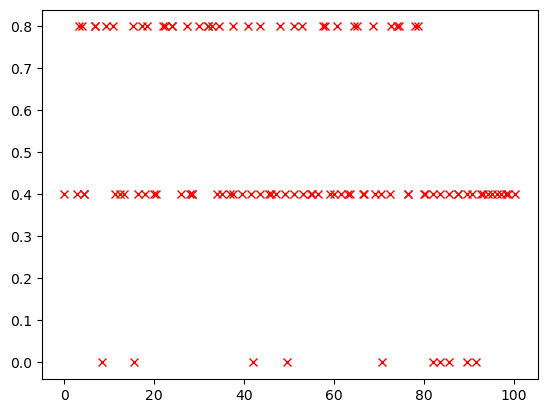

In [ ]:
rsp1 = read_Tek("Data\\Raumluft(1-50).CSV")
rsp2 = read_Tek("Data\\Raumluft(50-100).CSV")


rsp3df = data=pd.read_csv(f"{Path().resolve()}\\Data\\Raumluft(50-100).CSV",skiprows=15)
rsp3 = np.array([rsp3df["CH1"][219:1815] , rsp3df["CH2"][219:1815]])
plt.plot(rsp3[0][::15],rsp3[1][::15], "rx")
# plt.plot(rsp1["Ch1"][::15], rsp1["Ch2"][::15], "rx")
# plt.plot(rsp2["Ch1"][::15], rsp2["Ch2"][::15], "rx")
# plt.plot(np.linspace(0,50), np.ones(50)*21.2)
# plt.plot(np.linspace(0,50), np.ones(50)*4.)
# plt.show()
# plt.plot(rsp2["Ch1"][::20]/2 + 50, rsp2["Ch2"][::20], "gx")
# plt.show()

# 5 Qualitative Analyse

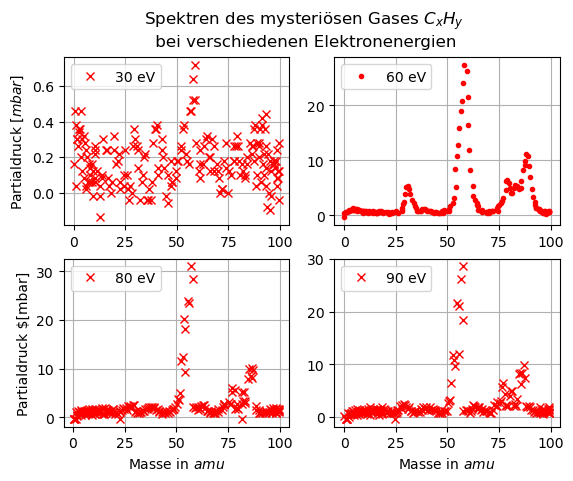

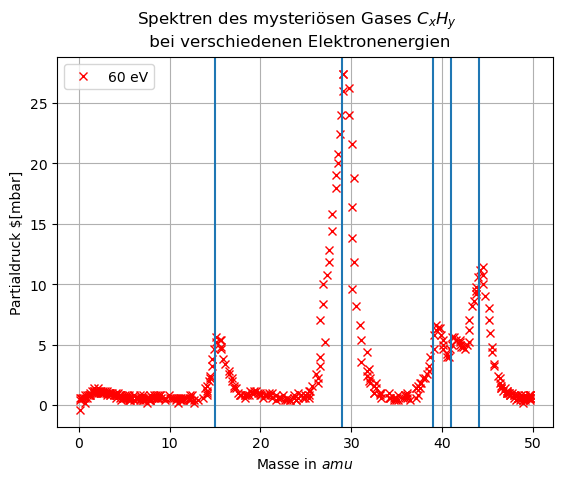

In [ ]:
propan30 = read_Tek("Data\\Propan_E30.CSV")
propan60 = read_Tek("Data\\Propan_E60.CSV")
propan80 = read_Tek("Data\\Propan_E80.CSV")
propan90 = read_Tek("Data\\Propan_E90.CSV")

fig, ax = plt.subplots(2,2)
ax[0][0].plot(propan30["Ch1"][::10], propan30["Ch2"][::10], "rx", label="30 eV")
ax[0][1].plot(propan60["Ch1"][::10], propan60["Ch2"][::10], "r.", label="60 eV")
ax[1][0].plot(propan80["Ch1"][::10], propan80["Ch2"][::10], "rx", label="80 eV")
ax[1][1].plot(propan90["Ch1"][::10], propan90["Ch2"][::10], "rx", label= "90 eV")
for i in [0,1]:
    for j in [0,1]:
        ax[i][j].grid()
        ax[i][j].legend()

# ax[0][0].fill_between(propan30["Ch1"][::10], propan30["Ch2"][::10], color="red")
# ax[0][1].fill_between(propan60["Ch1"][::10], propan60["Ch2"][::10], color="red")
# ax[1][0].fill_between(propan80["Ch1"][::10], propan80["Ch2"][::10], color="red")
# ax[1][1].fill_between(propan90["Ch1"][::10], propan90["Ch2"][::10], color="red")

ax[0][0].set(xlabel="", ylabel="Partialdruck $[mbar]$")
ax[1][0].set(xlabel="Masse in $amu$", ylabel="Partialdruck $[mbar]")
ax[1][1].set(xlabel="Masse in $amu$", ylabel="")
fig.suptitle("Spektren des mysteriösen Gases $C_xH_y$ \n bei verschiedenen Elektronenergien")

fig2, ax2 = plt.subplots()
ax2.plot(propan60["Ch1"][::5]/2, propan60["Ch2"][::5], "rx", label="60 eV")
ax2.grid()
ax2.legend()
ax2.set(xlabel="Masse in $amu$", ylabel="Partialdruck $[mbar]")
fig2.suptitle("Spektren des mysteriösen Gases $C_xH_y$ \n bei verschiedenen Elektronenergien")

ax2.axvline(x=15)
ax2.axvline(x=29)
ax2.axvline(x=39)
ax2.axvline(x=41)
ax2.axvline(x=44)